In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
PATH = '/gdrive/My Drive/poc_data/'
FILE = 'results_final.csv'

In [0]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv(PATH+FILE)
df.sample(5)

,commented_out_code,file,normal_comments,project,release,release_number,total_comments,total_lines
45344,0,/home/vitormelo/poc/scrapper/repos2/kibana/ui_...,0,kibana,v5.6.8,4.0,0,8
346863,0,/home/vitormelo/poc/scrapper/repos/Font-Awesom...,0,Font-Awesome,5.4.1,4.0,0,27
218998,0,/home/vitormelo/poc/scrapper/repos/ionic/src/c...,0,ionic,v2.0.0-beta.8,2.0,0,12
298935,46,/home/vitormelo/poc/scrapper/repos/elasticsear...,444,elasticsearch,v1.0.0.RC1,2.0,490,1107
88804,2,/home/vitormelo/poc/scrapper/repos2/openssl/ap...,59,openssl,OpenSSL_1_0_0p,4.0,61,401


In [0]:
len(df['project'].unique())

106

In [0]:
agg_dict = {
  'total_lines':'sum',
  'total_comments':'sum',
  'normal_comments':'sum',
  'commented_out_code':'sum'
}
  
df_sum_by_project = df.groupby(['project','release_number','release']).agg(agg_dict).sort_values(by=['project','release_number']).reset_index()
df_sum_by_project.head(12)

,project,release_number,release,total_lines,total_comments,normal_comments,commented_out_code
0,AndroidUtilCode,0.0,1.1.0,4056,1411,1103,308
1,AndroidUtilCode,1.0,1.8.0,22591,5420,4492,928
2,AndroidUtilCode,2.0,1.11.0,28089,6406,5382,1024
3,AndroidUtilCode,3.0,1.13.13,30044,6382,5545,837
4,AndroidUtilCode,4.0,1.18.3,36336,7537,6663,874
5,AndroidUtilCode,5.0,1.22.9,37718,7923,6798,1125
6,Arduino,0.0,2.0.0-rc1,22434,3962,3703,259
7,Arduino,1.0,2.1.0-rc2,25373,4533,4265,268
8,Arduino,2.0,2.3.0-rc1,49665,11210,10516,694
9,Arduino,3.0,2.4.0-rc2,53500,11825,11085,740


In [0]:
df_sum_by_project['out_code_tax'] = df_sum_by_project['commented_out_code']/df_sum_by_project['total_comments']
df_sum_by_project.head()

,project,release_number,release,total_lines,total_comments,normal_comments,commented_out_code,out_code_tax
0,AndroidUtilCode,0.0,1.1.0,4056,1411,1103,308,0.218285
1,AndroidUtilCode,1.0,1.8.0,22591,5420,4492,928,0.171218
2,AndroidUtilCode,2.0,1.11.0,28089,6406,5382,1024,0.159850
3,AndroidUtilCode,3.0,1.13.13,30044,6382,5545,837,0.131150
4,AndroidUtilCode,4.0,1.18.3,36336,7537,6663,874,0.115961


In [0]:
arr = []
for key, grp in df_sum_by_project.groupby(['project']):
  if any(np.isnan(grp['out_code_tax'].values)) :
    print("has nan "+key)
  else:
    arr.append(grp['out_code_tax'].values) 
  #plt.plot(grp['release_number'], grp['out_code_tax'])
arr = np.array(arr)

has nan d3
has nan storybook


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
[2 0 0 2 0 1 2 0 2 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 2 0 0 0 2 0
 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 1 2 2 0 2 2 0 0 0 0 0 2 0 0 2 2 0 0 2 0 0 0
 0 0 1 2 0 0 0 0 0 0 0 2 2 0 0 0 0 2 2 0 1 0 2 0 0 0 0 0 0 0]
[1 0 0 0 0 3 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0
 0 0 2 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0]
[0 1 1 0 1 2 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1
 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 4 0 0 1 0 0 1 0 1 1 1 4 1 1 0 4 1 1 0 1 1 1
 1

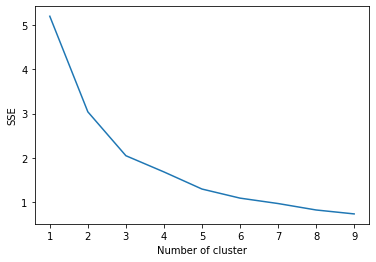

In [0]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(arr)
    #data["clusters"] = kmeans.labels_
    print(kmeans.labels_)
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [0]:
kmeans = KMeans(n_clusters=2, max_iter=1000).fit(arr)
kmeans.cluster_centers_

array([[0.07873381, 0.06995106, 0.06888612, 0.06678606, 0.06556652,
        0.06234139],
       [0.20866071, 0.43029378, 0.41710239, 0.25550758, 0.21733885,
        0.12110552]])

In [0]:
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(arr)
kmeans.cluster_centers_

array([[0.05783294, 0.04432303, 0.04733302, 0.04579052, 0.04349732,
        0.04269275],
       [0.08977833, 0.54012976, 0.53234103, 0.29241201, 0.24818257,
        0.12295461],
       [0.1672921 , 0.16300775, 0.14877762, 0.13905351, 0.13752925,
        0.12172088]])

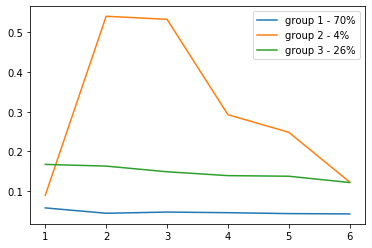

In [0]:
x = range(1,7)
labels=['group 1 - 70%','group 2 - 4%', 'group 3 - 26%']
for y_arr, label in zip(kmeans.cluster_centers_, labels):
    plt.plot(x, y_arr, label=label)
plt.legend()

In [0]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict(zip(unique, counts))

{0: 73, 1: 4, 2: 27}

In [0]:
a = 73/104
b = 4/104
c = 27/104
print(a,b,c)

0.7019230769230769 0.038461538461538464 0.25961538461538464


In [0]:
kmeans = KMeans(n_clusters=4, max_iter=1000).fit(arr)
kmeans.cluster_centers_

array([[0.17474996, 0.19692408, 0.17184871, 0.15342714, 0.14733243,
        0.11723921],
       [0.05953542, 0.04632984, 0.05027275, 0.04870781, 0.04755298,
        0.04715284],
       [0.        , 0.78431373, 0.74074074, 0.02684564, 0.02941176,
        0.02592593],
       [0.14482759, 0.52249637, 0.69371012, 0.65377532, 0.50702247,
        0.30717863]])

0 Line2D(_line5)
1 Line2D(_line12)
2 Line2D(_line19)
3 Line2D(_line26)
4 Line2D(_line33)
5 Line2D(_line40)


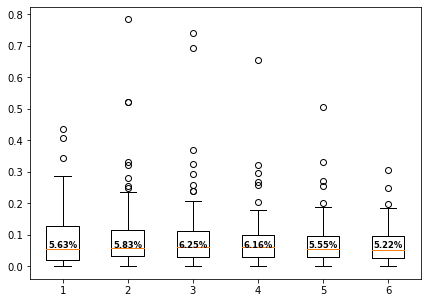

In [0]:
fig = plt.figure(1, figsize=(7, 5))
ax = fig.add_subplot(111)
bp = ax.boxplot(arr)

pos = np.arange(6) + 1
for tick, label in zip(range(6), bp['medians']):
  print(tick,label)
  ax.text(pos[tick], 0.06, "{0:.2f}%".format(label.get_ydata()[0]*100),
          horizontalalignment='center', size='small',weight='bold',
          color='black')


In [0]:
bp['medians'][0].get_ydata()


array([0.05633583, 0.05633583])

In [0]:
df_lang = df['file'].str.split(".", expand = False)
langs = []
for lang in df_lang:
  langs.append(lang[-1])
df['lang'] = langs

In [0]:
df_sum_by_lang = df.groupby(['lang','project','release_number']).agg(agg_dict).sort_values(by=['lang','project','release_number']).reset_index()
df_sum_by_lang['out_code_tax'] = df_sum_by_lang['commented_out_code']/df_sum_by_lang['total_comments']
df_sum_by_lang.head(12)

,lang,project,release_number,total_lines,total_comments,normal_comments,commented_out_code,out_code_tax
0,c,Arduino,0.0,7317,1334,1241,93,0.069715
1,c,Arduino,1.0,7944,1438,1333,105,0.073018
2,c,Arduino,2.0,32821,8260,7701,559,0.067676
3,c,Arduino,3.0,34102,8458,7889,569,0.067274
4,c,Arduino,4.0,37704,9365,8728,637,0.068019
5,c,Arduino,5.0,26342,6857,6377,480,0.070001
6,c,How-to-Make-a-Computer-Operating-System,0.0,15226,1646,1479,167,0.101458
7,c,How-to-Make-a-Computer-Operating-System,1.0,15226,1646,1479,167,0.101458
8,c,How-to-Make-a-Computer-Operating-System,2.0,15226,1646,1479,167,0.101458
9,c,How-to-Make-a-Computer-Operating-System,3.0,15226,1646,1479,167,0.101458


In [0]:
df_median_by_lang = df_sum_by_lang.groupby(['lang','release_number']).agg({'out_code_tax':'median'}).reset_index()
df_median_by_lang

,lang,release_number,out_code_tax
0,c,0.0,0.077608
1,c,1.0,0.076361
2,c,2.0,0.058406
3,c,3.0,0.058164
4,c,4.0,0.049825
5,c,5.0,0.047256
6,cpp,0.0,0.042308
7,cpp,1.0,0.052666
8,cpp,2.0,0.087912
9,cpp,3.0,0.075736


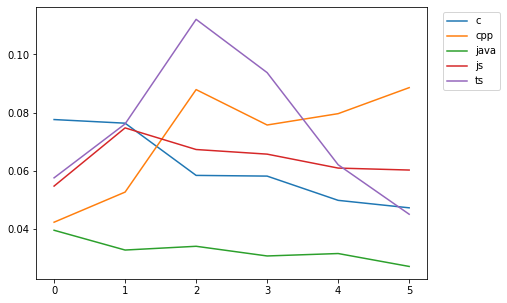

In [0]:
fig = plt.figure(1, figsize=(7, 5))
ax = fig.add_subplot(111)
for key, grp in df_median_by_lang.groupby(['lang']):
  ax.plot(grp['release_number'], grp['out_code_tax'], label=key)
ax.legend(bbox_to_anchor=(1.2, 1))
plt.show()

In [0]:
table = pd.pivot_table(df_median_by_lang, values='out_code_tax', index='lang',
                       columns='release_number', aggfunc=np.sum)
table

release_number,0.0,1.0,2.0,3.0,4.0,5.0
lang,,,,,,
c,0.077608,0.076361,0.058406,0.058164,0.049825,0.047256
cpp,0.042308,0.052666,0.087912,0.075736,0.079638,0.088581
java,0.039538,0.032737,0.034029,0.030699,0.031535,0.027095
js,0.054730,0.074743,0.067308,0.065716,0.060922,0.060247
ts,0.057564,0.076119,0.112066,0.093750,0.062069,0.045050
